In [1]:
#importing packages
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [16]:
#getting data
raw_data = yfinance.download (tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = 'ticker',
                              auto_adjust = True, treads = True)#BMW.DE as benchmark
df = raw_data.copy()

[*********************100%***********************]  3 of 3 completed


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6685 entries, 1996-11-08 to 2022-12-05
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (PAH3.DE, Open)    3520 non-null   float64
 1   (PAH3.DE, High)    3520 non-null   float64
 2   (PAH3.DE, Low)     3520 non-null   float64
 3   (PAH3.DE, Close)   3520 non-null   float64
 4   (PAH3.DE, Volume)  3520 non-null   float64
 5   (VOW3.DE, Open)    6242 non-null   float64
 6   (VOW3.DE, High)    6242 non-null   float64
 7   (VOW3.DE, Low)     6242 non-null   float64
 8   (VOW3.DE, Close)   6242 non-null   float64
 9   (VOW3.DE, Volume)  6242 non-null   float64
 10  (BMW.DE, Open)     6685 non-null   float64
 11  (BMW.DE, High)     6685 non-null   float64
 12  (BMW.DE, Low)      6685 non-null   float64
 13  (BMW.DE, Close)    6685 non-null   float64
 14  (BMW.DE, Volume)   6685 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 835.6 KB


In [18]:
df.describe()

PAH3.DE                                                       \
              Open         High          Low        Close        Volume   
count  3520.000000  3520.000000  3520.000000  3520.000000  3.520000e+03   
mean     45.528472    46.151708    44.840553    45.499942  6.260013e+05   
std      16.485443    16.635080    16.320229    16.466793  4.740680e+05   
min      16.696565    17.005868    15.533821    16.519003  0.000000e+00   
25%      32.432754    33.001409    31.794007    32.388946  3.683390e+05   
50%      44.528704    45.137442    43.928658    44.543661  5.085010e+05   
75%      54.453139    55.081558    53.744158    54.436891  7.212618e+05   
max      95.804105    96.228629    93.492716    95.473892  6.168811e+06   

           VOW3.DE                                                       \
              Open         High          Low        Close        Volume   
count  6242.000000  6242.000000  6242.000000  6242.000000  6.242000e+03   
mean     79.151182    80.185410    77.974213    79.096437  8.710810e+05   
std      56.927937    57.537306    56.214564    56.840140  9.948828e+05   
min      11.210595    11.629453    10.906493    10.988846  0.000000e+00   
25%      19.026774    19.288154    18.632164    19.029335  2.244775e+05   
50%      73.059691    74.109896    72.017934    73.222187  7.130475e+05   
75%     128.982586   130.346933   127.234642   128.915993  1.171026e+06   
max     231.575124   233.612982   226.850990   228.379395  1.753497e+07   

            BMW.DE                                                       
              Open         High          Low        Close        Volume  
count  6685.000000  6685.000000  6685.000000  6685.000000  6.685000e+03  
mean     36.747045    37.182876    36.269197    36.734112  2.190723e+06  
std      21.900655    22.088068    21.687872    21.895495  1.483992e+06  
min       9.328611     9.348643     9.142151     9.293167  0.000000e+00  
25%      18.590932    18.871451    18.308326    18.590090  1.285700e+06  
50%      25.159620    25.416750    24.867254    25.147764  1.887061e+06  
75%      57.193187    57.778084    56.567119    57.163231  2.703598e+06  
max      92.837648    93.339571    91.759437    92.317131  2.871954e+07

In [19]:
df.head()

PAH3.DE                       VOW3.DE                        \
              Open High Low Close Volume    Open High Low Close Volume   
Date                                                                     
1996-11-08     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-11     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-12     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-13     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-14     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   

              BMW.DE                                         
                Open      High       Low     Close   Volume  
Date                                                         
1996-11-08  9.353779  9.353779  9.333747  9.333747   767000  
1996-11-11  9.343506  9.348643  9.288031  9.308577   260000  
1996-11-12  9.328611  9.414392  9.293168  9.378950  1066000  
1996-11-13  9.422609  9.422609  9.343506  9.364052   793000  
1996-11-14  9.351211  9.394359  9.313714  9.394359   351000

In [20]:
df.tail()

PAH3.DE                                                 VOW3.DE  \
                 Open       High        Low      Close     Volume        Open   
Date                                                                            
2022-11-29  58.000000  58.360001  57.360001  58.000000   539164.0  135.860001   
2022-11-30  58.360001  59.500000  58.299999  58.340000  1524347.0  138.600006   
2022-12-01  58.820000  59.099998  57.380001  57.540001   804117.0  141.220001   
2022-12-02  57.500000  58.540001  57.160000  58.419998   620493.0  138.380005   
2022-12-05  59.000000  59.279999  58.279999  58.959999   607227.0  140.000000   

                                                              BMW.DE  \
                  High         Low       Close     Volume       Open   
Date                                                                   
2022-11-29  138.179993  134.800003  137.839996   827514.0  83.830002   
2022-11-30  140.600006  138.520004  139.899994  1515956.0  85.000000   
2022-12-01  141.860001  138.479996  139.380005   822371.0  86.620003   
2022-12-02  140.160004  137.339996  139.020004   945911.0  84.889999   
2022-12-05  141.619995  139.539993  140.839996  1066281.0  85.309998   

                                                      
                 High        Low      Close   Volume  
Date                                                  
2022-11-29  84.989998  83.370003  84.750000  1274432  
2022-11-30  86.370003  84.800003  86.309998  2224421  
2022-12-01  86.709999  84.419998  85.139999  1084490  
2022-12-02  85.949997  84.629997  85.260002   921996  
2022-12-05  86.059998  85.040001  85.860001   870971

### Defining Key Dates of buyouts

In [21]:
# Starting Date
start_date = "2009-04-05" 

# First Official Announcement - 49.9%
ann_1 = "2009-12-09" 

# Second Official Announcement - 51.1%
ann_2 = "2012-07-05" 

#Ending Date
end_date = "2014-01-01"

# Dieselgate
d_gate = '2015-09-20' 

## Pre processing

In [22]:
# Extracting Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

In [23]:
# Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

In [24]:
# Creating Squared Returns
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

In [25]:
# Extracting Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [26]:
# Assigning the Frequency and Filling NA Values
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [27]:
# Removing Surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

In [28]:
df.head()

,vol,por,bmw,ret_vol,ret_por,ret_bmw,sq_vol,sq_por,sq_bmw,q_vol,q_por,q_bmw
,,,,,,,,,,,,
Date,,,,,,,,,,,,
1996-11-08,32.022877,25.59684,9.333747,-4.405675,-3.83136,-0.269670,19.409971,14.679322,0.072722,56336.0,901566.0,767000.0
1996-11-11,32.022877,25.59684,9.308577,-4.405675,-3.83136,-0.269670,19.409971,14.679322,0.072722,56336.0,901566.0,260000.0
1996-11-12,32.022877,25.59684,9.378950,-4.405675,-3.83136,0.756007,19.409971,14.679322,0.571547,56336.0,901566.0,1066000.0
1996-11-13,32.022877,25.59684,9.364052,-4.405675,-3.83136,-0.158848,19.409971,14.679322,0.025233,56336.0,901566.0,793000.0
1996-11-14,32.022877,25.59684,9.394359,-4.405675,-3.83136,0.323651,19.409971,14.679322,0.104750,56336.0,901566.0,351000.0


## Plotting

In [29]:
from pylab import rcParams
rcParams['figure.figsize']=20,6

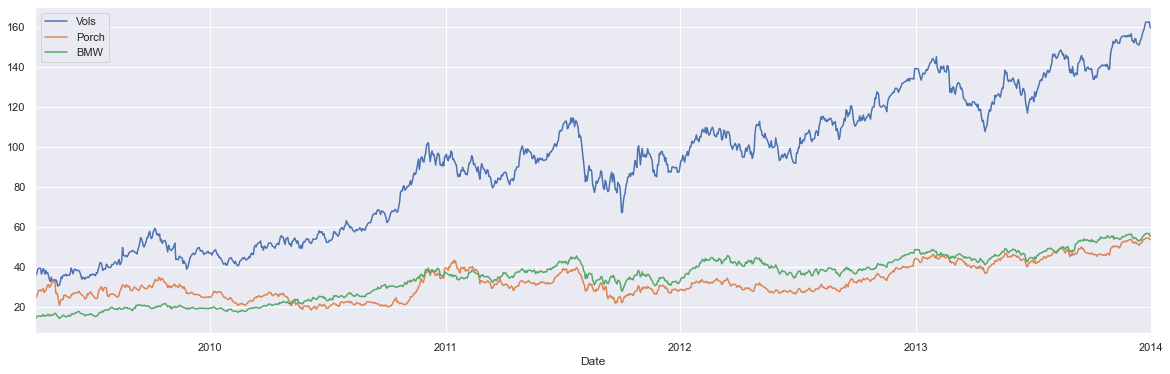

In [30]:
#Clossing prices
df['vol'][start_date:end_date].plot(label = 'Vols')
df['por'][start_date:end_date].plot(label = 'Porch')
df['bmw'][start_date:end_date].plot(label = 'BMW')
plt.legend()

lets visualise the trend before and after the first and second announcement

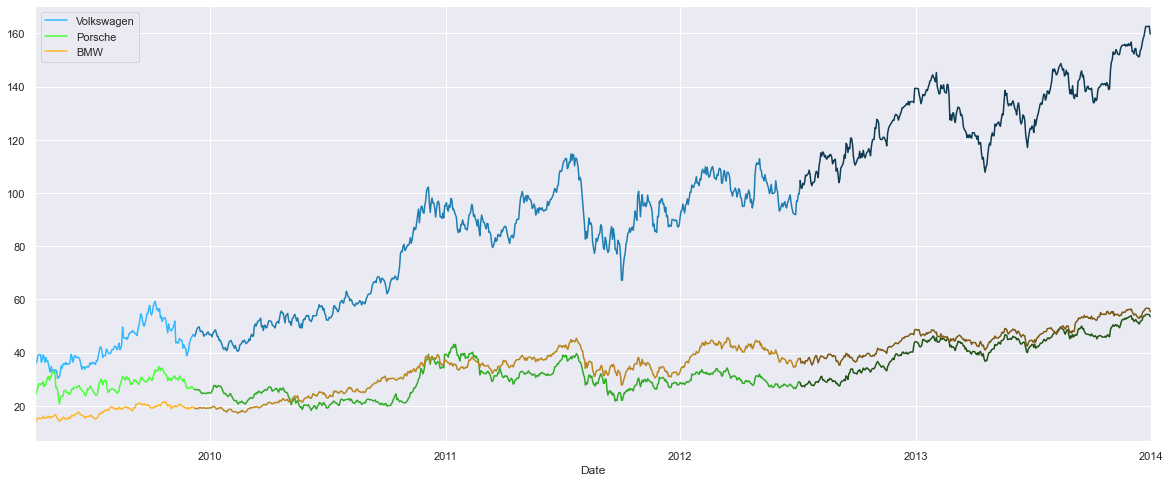

In [31]:
df['vol'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:ann_1].plot(color = "#49FF3A")
df['bmw'][start_date:ann_1].plot(color = "#FEB628")

df['vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['por'][ann_1:ann_2].plot(color = "#2FAB25")
df['bmw'][ann_1:ann_2].plot(color = "#BA861F")

df['vol'][ann_2:end_date].plot(color = "#0E3A52")
df['por'][ann_2:end_date].plot(color = "#225414")
df['bmw'][ann_2:end_date].plot(color = "#7C5913")

plt.legend(['Volkswagen','Porsche','BMW'])

Text(0.5, 1.0, ' after buyouts')

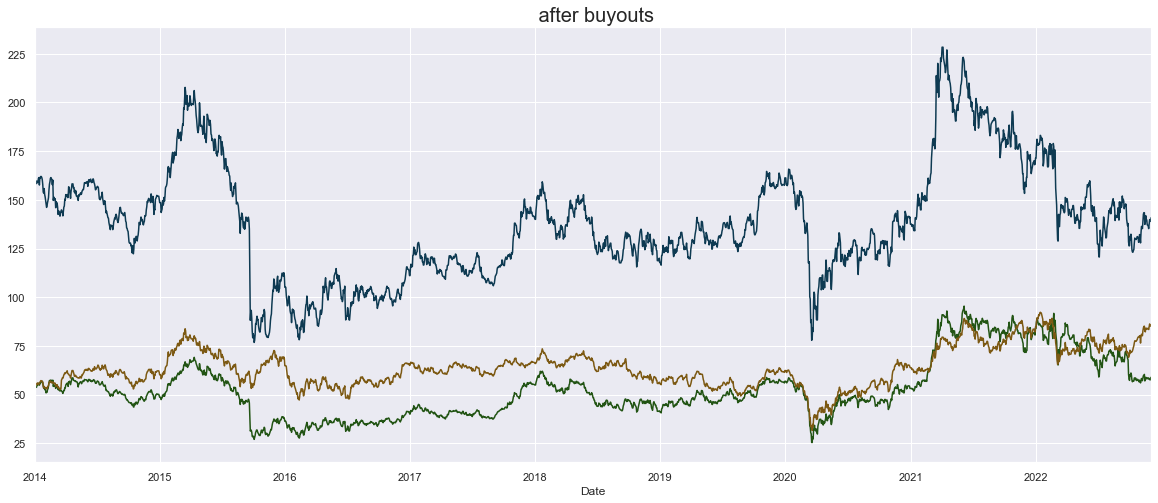

In [32]:
df['vol'][end_date:].plot(figsize= (20,8),color = "#0E3A52")
df['por'][end_date:].plot(color = "#225414")
df['bmw'][end_date:].plot(color = "#7C5913")
plt.title(' after buyouts', size = 20)

Lets see the correlation these manufacturers

Text(0.5, 1.0, 'Correlation between manufacturer')

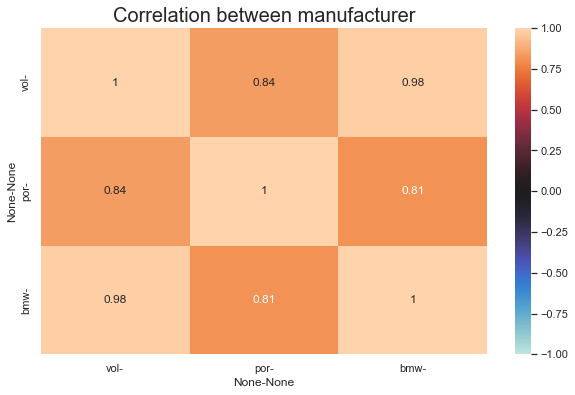

In [33]:
rcParams['figure.figsize']=10,6
corr1 = df[['vol','por','bmw']][start_date:end_date].corr()
ax = sns.heatmap(corr1, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation between manufacturer',size = 20)

let us see if the correlation changes before and after the announcements

correlation before and after the buyout

Text(0.5, 1.0, 'Correlation between start date and first announcement')

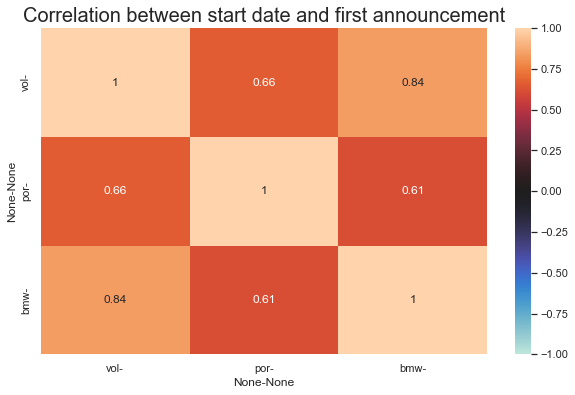

In [34]:
corr2 = df[['vol','por','bmw']][start_date:ann_1].corr()
ax = sns.heatmap(corr2, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation between start date and first announcement',size = 20)

less correlatio between vols and proch before the first buyout

Text(0.5, 1.0, 'Correlation between first and second announcement')

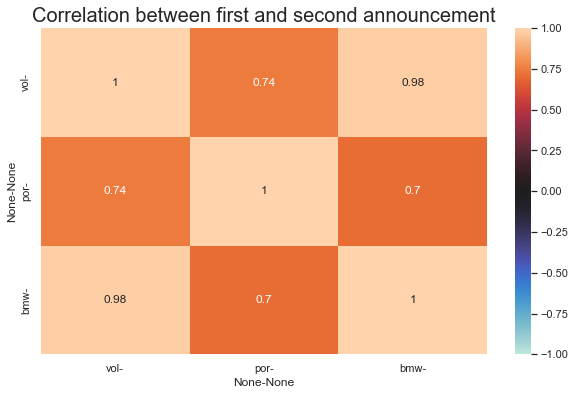

In [35]:
corr3 = df[['vol','por','bmw']][ann_1:ann_2].corr()
ax = sns.heatmap(corr3, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation between first and second announcement',size = 20)

correlation between vols and proch increased

Text(0.5, 1.0, 'Correlation after second announcemnet')

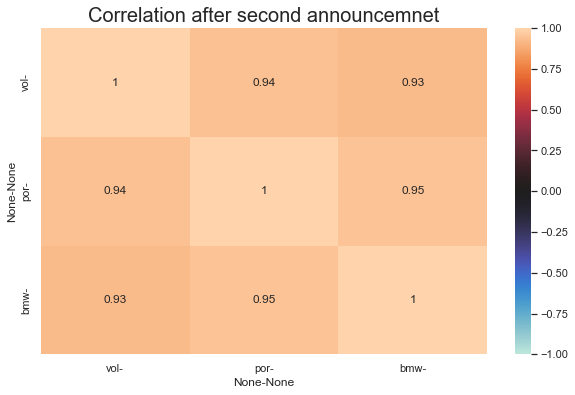

In [36]:
corr4 = df[['vol','por','bmw']][ann_2:end_date].corr()
ax = sns.heatmap(corr4, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation after second announcemnet',size = 20)

vols and proch is highly correlated after the second buyout

Text(0.5, 1.0, 'Correlation after Dieselgat scandal')

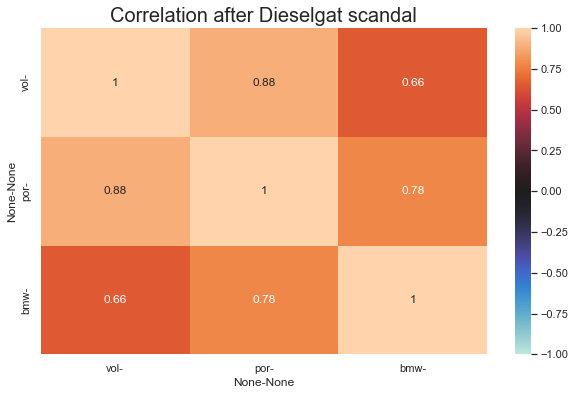

In [37]:
corr5 = df[['vol','por','bmw']][end_date:].corr()
ax = sns.heatmap(corr5, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation after Dieselgat scandal',size = 20)

the corelation between bmw the other companies dicreased after the scandal

# Fitting Models
## For Volkswagen

In [38]:
# before buyout
mod_pr_pre_vol = auto_arima(df.vol[start_date:ann_1], X=df[['por','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5,seasonal=True)
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -313.553
Date:                Mon, 05 Dec 2022   AIC                            637.106
Time:                        19:42:28   BIC                            653.015
Sample:                    04-06-2009   HQIC                           643.557
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6858      0.424      1.618      0.106      -0.145       1.517
por            0.3925      0.094      4.169      0.000       0.208       0.577
bmw            0.7059      0.335      2.107      0.035       0.049       1.363
ar.L1          0.9633      0.020     48.670      0.000       0.925       1.002
sigma2         1.9550      0.133     14.718      0.000       1.695       2.215
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               166.03
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
#between buyouts
mod_pr_btn_vol = auto_arima(df.vol[ann_1:ann_2], X = df[['por','bmw']][ann_1:ann_2],m = 5,max_order=None,)
mod_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1044.485
Date:                Mon, 05 Dec 2022   AIC                           2094.969
Time:                        19:42:36   BIC                           2108.496
Sample:                    12-09-2009   HQIC                          2100.208
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            0.7760      0.060     12.842      0.000       0.658       0.894
bmw            1.5801      0.074     21.269      0.000       1.435       1.726
sigma2         1.3170      0.054     24.532      0.000       1.212       1.422
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):               112.42
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
# after buyout
mod_pr_post_vol = auto_arima(df.vol[ann_2:end_date], X = df[['por','bmw']][ann_2:end_date],m=5,max_order=None)
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -587.155
Date:                Mon, 05 Dec 2022   AIC                           1180.310
Time:                        19:42:41   BIC                           1192.201
Sample:                    07-05-2012   HQIC                          1185.024
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            1.6868      0.056     30.369      0.000       1.578       1.796
bmw            0.8749      0.093      9.381      0.000       0.692       1.058
sigma2         1.1983      0.059     20.461      0.000       1.084       1.313
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               103.80
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.39
Prob(H) (two-sided):                  0.15   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

After the buyout, price of vols relays on the current price of porch rather than the previous value. Lets see if how model fits for the values of porch

## Porch

In [41]:
# before buyout
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1], X=df[['vol','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5,seasonal=True)
#between buyouts
mod_pr_btn_por = auto_arima(df.por[ann_1:ann_2], X = df[['vol','bmw']][ann_1:ann_2],m = 5,max_order=None,)
# after buyout
mod_pr_post_por = auto_arima(df.por[ann_2:end_date], X = df[['vol','bmw']][ann_2:end_date],m=5,max_order=None)

In [42]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -219.737
Date:                Mon, 05 Dec 2022   AIC                            451.474
Time:                        19:43:24   BIC                            470.565
Sample:                    04-06-2009   HQIC                           459.216
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5562      0.363      1.533      0.125      -0.155       1.267
vol            0.1172      0.054      2.157      0.031       0.011       0.224
bmw            0.9170      0.165      5.558      0.000       0.594       1.240
ar.L1          1.0748      0.059     18.194      0.000       0.959       1.191
ar.L2         -0.1589      0.059     -2.716      0.007      -0.274      -0.044
sigma2         0.6837      0.048     14.098      0.000       0.589       0.779
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               559.38
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -558.076
Date:                Mon, 05 Dec 2022   AIC                           1126.153
Time:                        19:43:24   BIC                           1148.696
Sample:                    12-09-2009   HQIC                          1134.884
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.1819      0.016     11.134      0.000       0.150       0.214
bmw            0.3449      0.048      7.200      0.000       0.251       0.439
ar.L1          0.6585      0.230      2.860      0.004       0.207       1.110
ma.L1         -0.5898      0.246     -2.394      0.017      -1.073      -0.107
sigma2         0.3090      0.010     32.415      0.000       0.290       0.328
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1076.51
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  390
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 5)   Log Likelihood                -196.988
Date:                             Mon, 05 Dec 2022   AIC                            401.976
Time:                                     19:43:24   BIC                            417.831
Sample:                                 07-05-2012   HQIC                           408.262
                                      - 01-01-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.2261      0.013     16.876      0.000       0.200       0.252
bmw            0.2604      0.043      6.036      0.000       0.176       0.345
ma.S.L5       -0.1249      0.057     -2.210      0.027      -0.236      -0.014
sigma2         0.1612      0.006     27.851      0.000       0.150       0.173
===================================================================================
Ljung-Box (L1) (Q):                   2.09   Jarque-Bera (JB):               613.59
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Models changes in each announcements 

# Predicting Vols prices

### Before buyouts

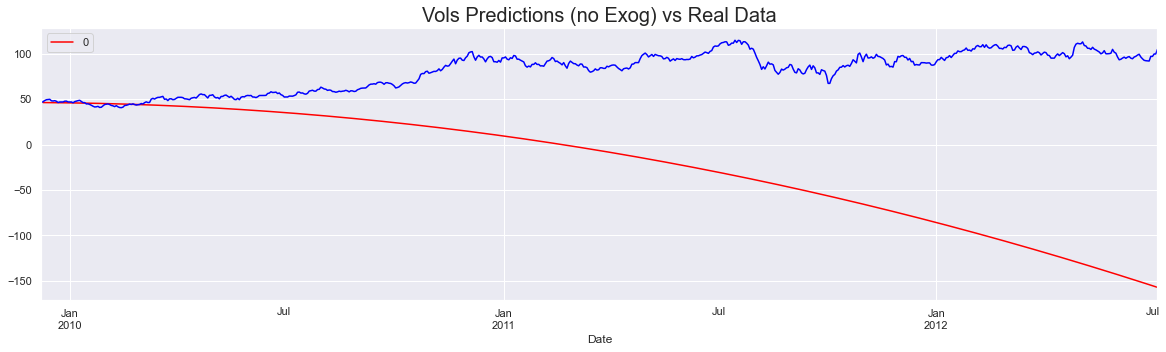

In [45]:
# without exog
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue",label = 'Actual')
plt.title("Vols Predictions (no Exog) vs Real Data", size = 20)
plt.show()


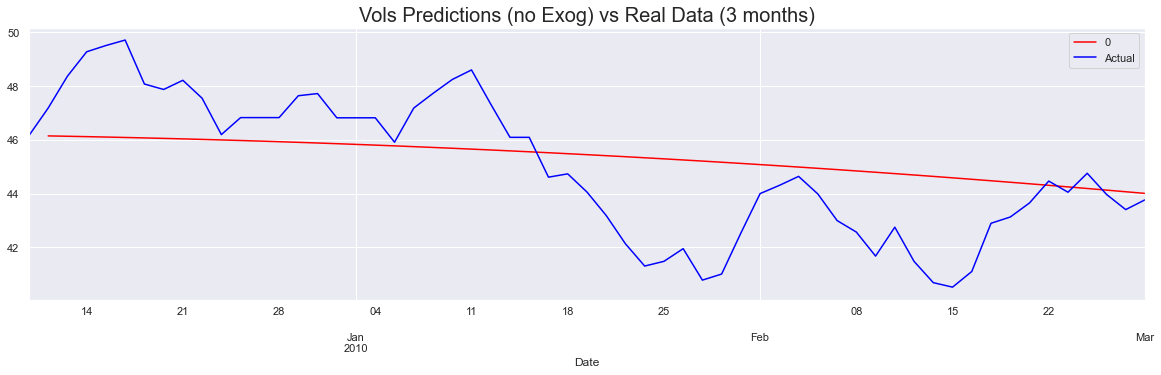

In [46]:
df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize = (20,5), color = "red", label = 'Predicted')
df.vol[ann_1:'2010-03-01'].plot(color = "blue",label = 'Actual')
plt.title("Vols Predictions (no Exog) vs Real Data (3 months)", size = 20)
plt.legend()
plt.show()

The model perform poorly, but picksup the trend a bit in the begining 

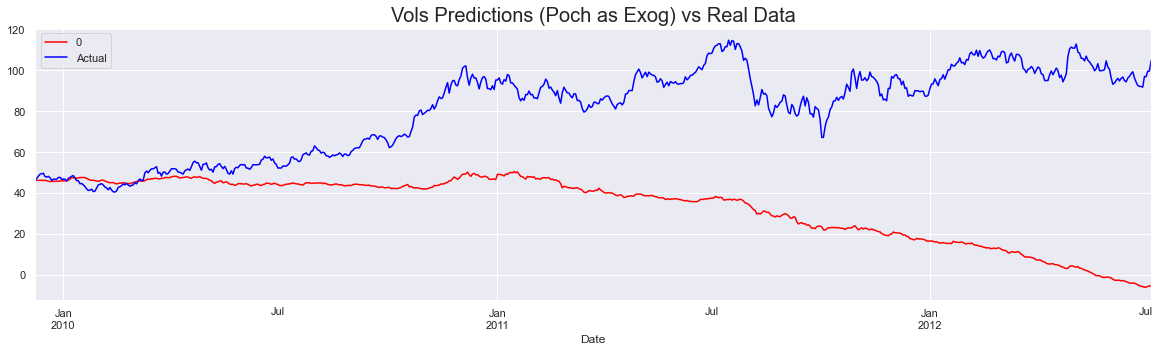

In [47]:
# with por as exog

model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], X = df[['por']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")
df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]),X = df[['por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue",label = 'Actual')
plt.title("Vols Predictions (Poch as Exog) vs Real Data", size = 20)
plt.legend()
plt.show()

Perform better than the previous model, but not perform poorly on long run

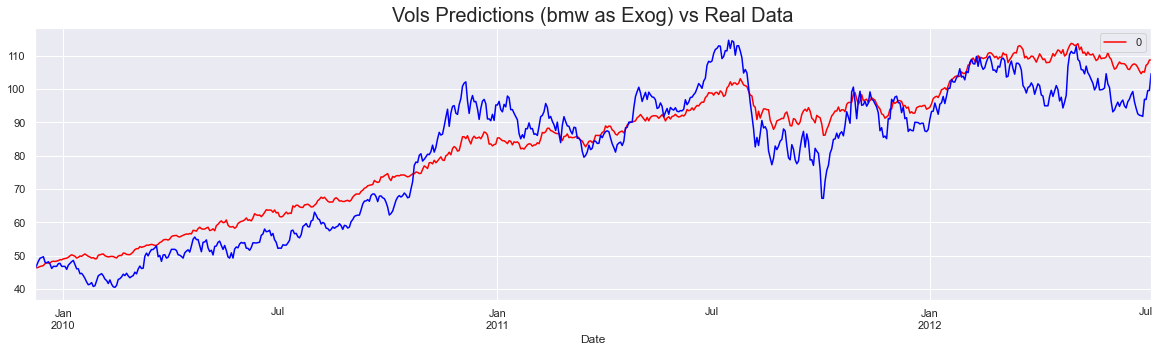

In [48]:
# with mbw as exog
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], X = df[['bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), X = df[['bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue",label = 'Actual')
plt.title("Vols Predictions (bmw as Exog) vs Real Data", size = 20)
plt.show()


model perform much better than the prevous models. picks up boths rise and fall of trend in the actual data

Text(0.5, 1.0, 'Vols Predictions (Porch and bmw Exog) vs Real Data')

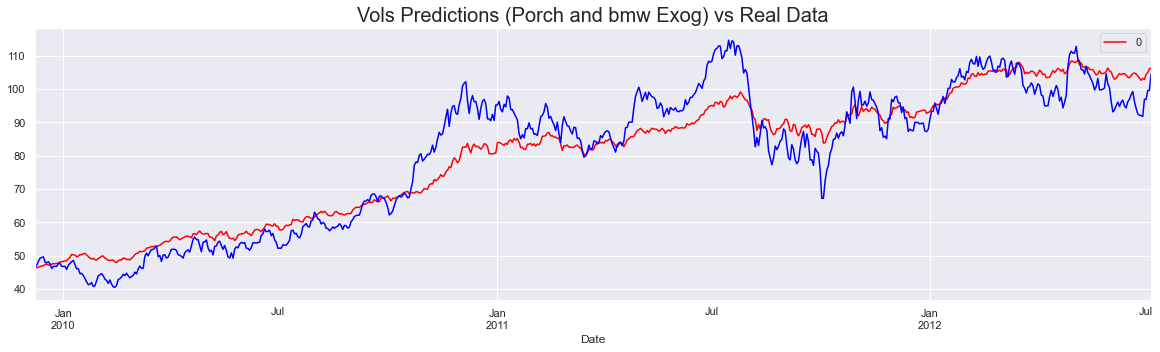

In [49]:
# both porch and bmw as exog
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], X = df[['por', 'bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), X = df[['por','bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue",label = 'Actual')
plt.title("Vols Predictions (Porch and bmw Exog) vs Real Data", size = 20)


matches the smaller shifts much better, and adujust to jumps and drops faster.

### Between buyouts

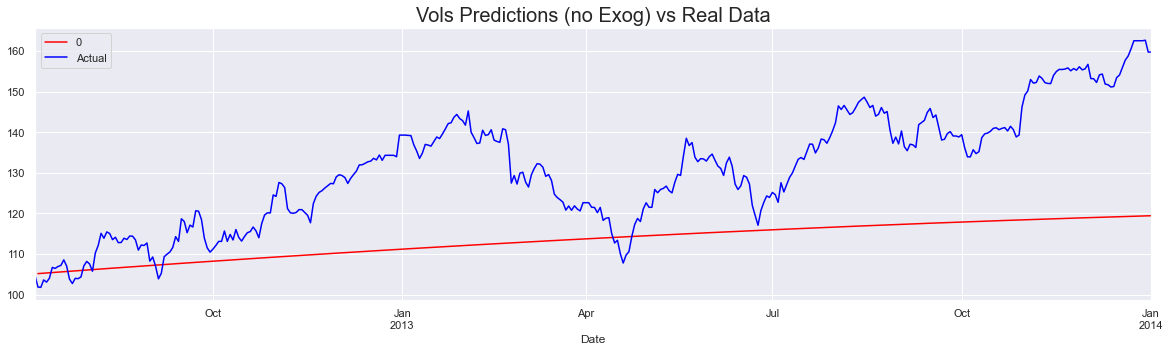

In [50]:
# no exog
model_auto_pred_bt = auto_arima(df.vol[ann_1:ann_2],
                          m = 5, max_p = 4, max_q = 4, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_bt.predict(n_periods = len(df[ann_2:end_date])),
                               index = df[ann_2:end_date].index)
df_auto_pred_pr[ann_2:end_date].plot(figsize = (20,5), color = "red")

df.vol[ann_2:end_date].plot(color = "blue",label = 'Actual')
plt.title("Vols Predictions (no Exog) vs Real Data", size = 20)
plt.legend()
plt.show()


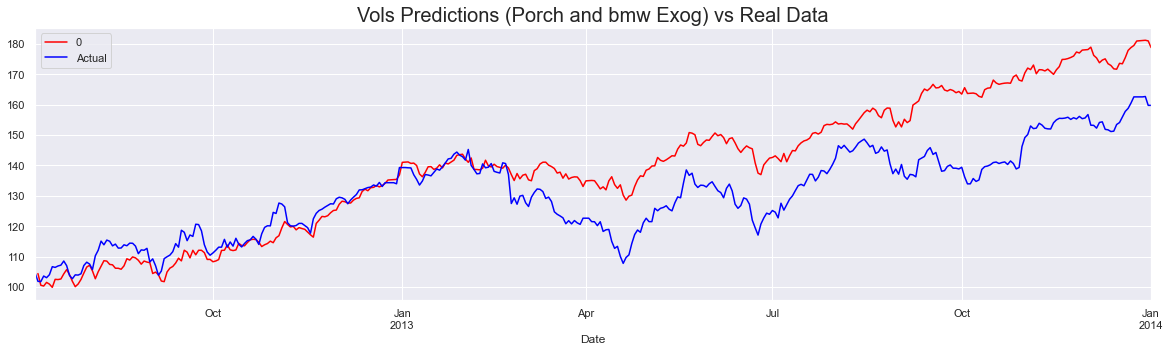

In [51]:
# both porch and bmw as exog
model_auto_pred_bt = auto_arima(df.vol[ann_1:ann_2], X = df[['por', 'bmw']][ann_1:ann_2],
                          m = 5, max_p = 4, max_q = 4, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_bt.predict(n_periods = len(df[ann_2:end_date]), X = df[['por','bmw']][ann_2:end_date]),
                               index = df[ann_2:end_date].index)
df_auto_pred_pr[ann_2:end_date].plot(figsize = (20,5), color = "red")

df.vol[ann_2:end_date].plot(color = "blue",label = 'Actual')
plt.title("Vols Predictions (Porch and bmw Exog) vs Real Data", size = 20)
plt.legend()
plt.show()


model performs well till 2013 march, then deviates

### After buyouts


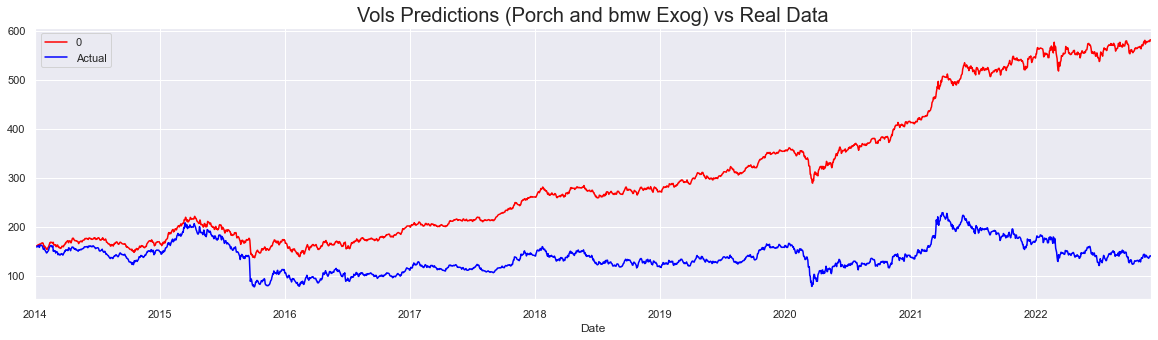

In [52]:
# both porch and bmw as exog
model_auto_pred_pr = auto_arima(df.vol[ann_2:end_date], X = df[['por', 'bmw']][ann_2:end_date],
                          m = 5, max_p = 4, max_q = 4, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[end_date:]), X = df[['por','bmw']][end_date:]),
                               index = df[end_date:].index)
df_auto_pred_pr[end_date:].plot(figsize = (20,5), color = "red")

df.vol[end_date:].plot(color = "blue",label = 'Actual')
plt.title("Vols Predictions (Porch and bmw Exog) vs Real Data", size = 20)
plt.legend()
plt.show()

**The model couldnt take the dieselgate scandal into account, and deviate from the catual value after the 09-2015 the dieselgate incident**

## Volatility of prices - VW

<AxesSubplot:xlabel='Date'>

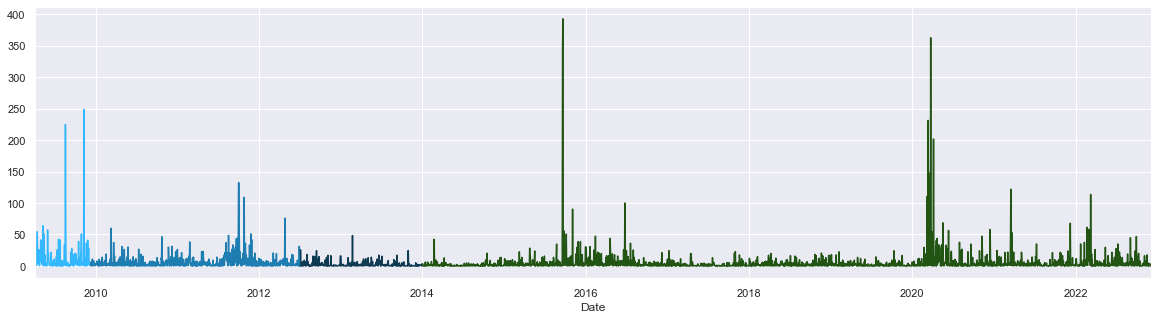

In [53]:
df['sq_vol'][start_date:ann_1].plot(figsize = (20,5), color = "#33B8FF")
df['sq_vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['sq_vol'][ann_2:end_date].plot(color = "#0E3A52")
df['sq_vol'][end_date:].plot(color = "#225414")

`hight volatility before buyout and at the time of dieselgate scandal



Text(0.5, 1.0, 'volatility during dieselgate ')

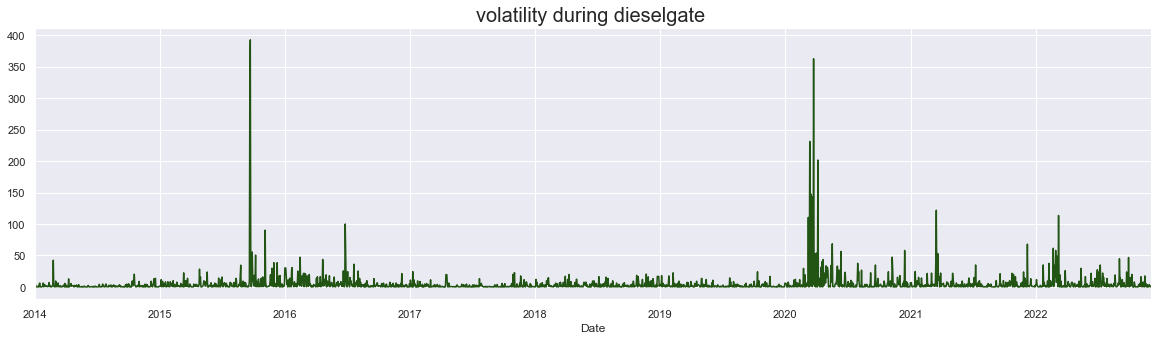

In [54]:
df['sq_vol'][end_date:].plot(figsize = (20,5),color = "#225414")
plt.title("volatility during dieselgate ", size = 20)

# Predicting volatility for the different period

In [55]:
model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_pre = model_garch_pre.fit(update_freq = 5)

model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_btn = model_garch_btn.fit(update_freq = 5)

model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post = model_garch_post.fit(update_freq = 5)

model_garch_dg = arch_model(df.ret_vol[end_date:], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_dg = model_garch_dg.fit(update_freq = 5)


Iteration:      5,   Func. Count:     31,   Neg. LLF: 475.7774209636084
Iteration:     10,   Func. Count:     56,   Neg. LLF: 475.00301571757063
Iteration:     15,   Func. Count:     80,   Neg. LLF: 474.99037279132756
Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.9903727390339
            Iterations: 15
            Function evaluations: 80
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1526.7534250423034
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1526.7314940679191
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1526.7314940666727
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     34,   Neg. LLF: 724.562218204002
Optimization terminated successfully    (Exit mode 0)
            Current function value: 724.5578704725742
            Iterations: 7
            

In [56]:
#Before buyout
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.990
Distribution:                  Normal   AIC:                           957.981
Method:            Maximum Likelihood   BIC:                           970.708
                                        No. Observations:                  178
Date:                Mon, Dec 05 2022   Df Residuals:                      177
Time:                        19:44:21   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1570      0.266      0.589      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6196      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.195e-02      1.675  9.399e-02 [-2.623e-02,  0.334]
beta[1]        0.0000      0.349      0.000      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [57]:
#between buyouts
results_garch_btn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Mon, Dec 05 2022   Df Residuals:                      671
Time:                        19:44:21   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [58]:
#after buyouts
results_garch_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -724.558
Distribution:                  Normal   AIC:                           1457.12
Method:            Maximum Likelihood   BIC:                           1472.98
                                        No. Observations:                  390
Date:                Mon, Dec 05 2022   Df Residuals:                      389
Time:                        19:44:21   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2298  9.845e-02      2.334  1.958e-02 [3.685e-02,  0.423]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7719      0.677      1.141      0.254    [ -0.554,  2.098]
alpha[1]       0.1853      0.145      1.273      0.203 [-9.991e-02,  0.470]
beta[1]        0.5136      0.331      1.550      0.121    [ -0.136,  1.163]
===========================================================================

Covariance estimator: robust
"""

In [59]:
#after Dieselgate
results_garch_dg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4888.56
Distribution:                  Normal   AIC:                           9785.11
Method:            Maximum Likelihood   BIC:                           9808.13
                                        No. Observations:                 2329
Date:                Mon, Dec 05 2022   Df Residuals:                     2328
Time:                        19:44:21   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0596  3.818e-02      1.560      0.119 [-1.528e-02,  0.134]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0738  3.914e-02      1.886  5.930e-02 [-2.896e-03,  0.151]
alpha[1]       0.0864  2.235e-02      3.868  1.099e-04  [4.263e-02,  0.130]
beta[1]        0.9022  2.644e-02     34.119 3.867e-255    [  0.850,  0.954]
===========================================================================

Covariance estimator: robust
"""

Diffrent volatility trends in each time period

Predicting volatility arround dieselgate

Iteration:      5,   Func. Count:     35,   Neg. LLF: 10210.152095326797
Iteration:     10,   Func. Count:     63,   Neg. LLF: 10163.006711385184
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10163.006680740173
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


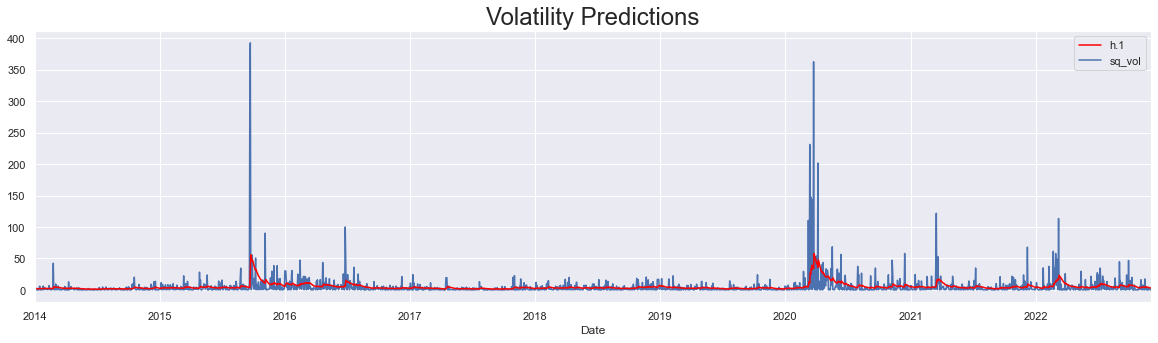

In [60]:
model_garch = arch_model(df.ret_vol, mean = "Constant",  vol = "GARCH", p = 1, q = 1)
result_garch = model_garch.fit(last_obs=end_date,update_freq = 5)
pred_garch = result_garch.forecast(horizon = 1, align = 'target')
pred_garch.residual_variance[end_date:].plot(figsize = (20,5), color = "red", zorder = 2, label = 'Volatility')
df.sq_vol[end_date:].plot( zorder = 1)
plt.title("Volatility Predictions", size = 24)
plt.legend()
plt.show()


# porsche volatility

<AxesSubplot:xlabel='Date'>

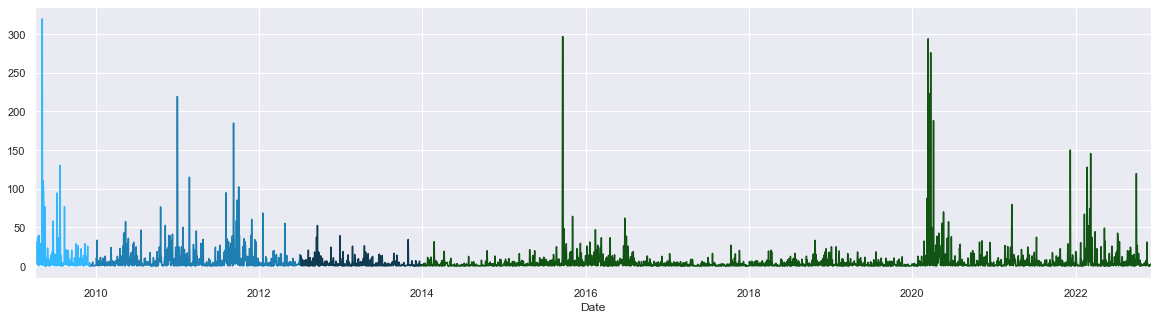

In [63]:
df['sq_por'][start_date:ann_1].plot(figsize = (20,5), color = "#33B8FF")
df['sq_por'][ann_1:ann_2].plot(color = "#1E7EB2")
df['sq_por'][ann_2:end_date].plot(color = "#0E3A52")
df['sq_por'][end_date:].plot(color = "#115414")

Iteration:      5,   Func. Count:     36,   Neg. LLF: 56753.4487885973
Iteration:     10,   Func. Count:     72,   Neg. LLF: 14267.692991981745
Iteration:     15,   Func. Count:    110,   Neg. LLF: 798549.008612479
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1774.0615481616
            Iterations: 22
            Function evaluations: 134
            Gradient evaluations: 18


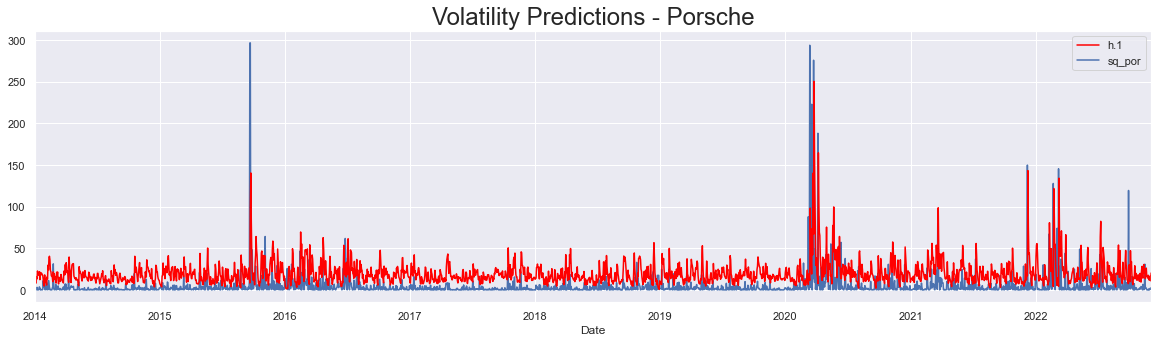

In [65]:
model_garch2 = arch_model(df.ret_por, mean = "Constant",  vol = "GARCH", p = 1, q = 1)
result_garch2 = model_garch2.fit(last_obs=end_date,update_freq = 5)
pred_garch2 = result_garch2.forecast(horizon = 1, align = 'target')
pred_garch2.residual_variance[end_date:].plot(figsize = (20,5), color = "red", zorder = 2, label = 'Volatility')
df.sq_por[end_date:].plot( zorder = 1)
plt.title("Volatility Predictions - Porsche", size = 24)
plt.legend()
plt.show()